In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("aug_train.csv")
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
...,...,...,...,...,...,...,...,...,...,...,...,...
382149,164549,Male,24,1,15.0,0,< 1 Year,Yes,23938.0,152.0,105,0
382150,247064,Male,27,1,28.0,1,< 1 Year,No,336395.0,152.0,144,0
382151,165293,Male,45,1,28.0,0,1-2 Year,Yes,40443.0,26.0,187,0
382152,383241,Female,28,1,28.0,1,< 1 Year,No,25380.0,152.0,208,0


In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,0.998108,26.406867,0.489182,30711.271362,111.939812,154.189429,0.163811
std,139527.487326,15.226897,0.043455,13.181241,0.499884,17061.595532,54.286511,83.735107,0.370104
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115006.250000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,81.000000,0.000000
50%,230461.500000,36.000000,1.000000,28.000000,0.000000,31692.000000,145.000000,154.000000,0.000000
75%,345434.750000,49.000000,1.000000,35.000000,1.000000,39447.750000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [3]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [4]:
# Load your data
train_data = pd.read_csv('aug_train.csv')
test_data = pd.read_csv('aug_test.csv')

In [5]:
# Z-score Method to detect outliers in `Annual_Premium`
from scipy import stats
import numpy as np

# Train Data
z_scores_train = np.abs(stats.zscore(train_data['Annual_Premium']))
outliers_z_train = train_data[z_scores_train > 3]

# Test Data
z_scores_test = np.abs(stats.zscore(test_data['Annual_Premium']))
outliers_z_test = test_data[z_scores_test > 3]

print("Outliers in Train Data (Z-score method):", outliers_z_train.shape[0])
print("Outliers in Test Data (Z-score method):", outliers_z_test.shape[0])

Outliers in Train Data (Z-score method): 2139
Outliers in Test Data (Z-score method): 441


Outliers in Train Data (IQR method): 10407
Outliers in Test Data (IQR method): 2108


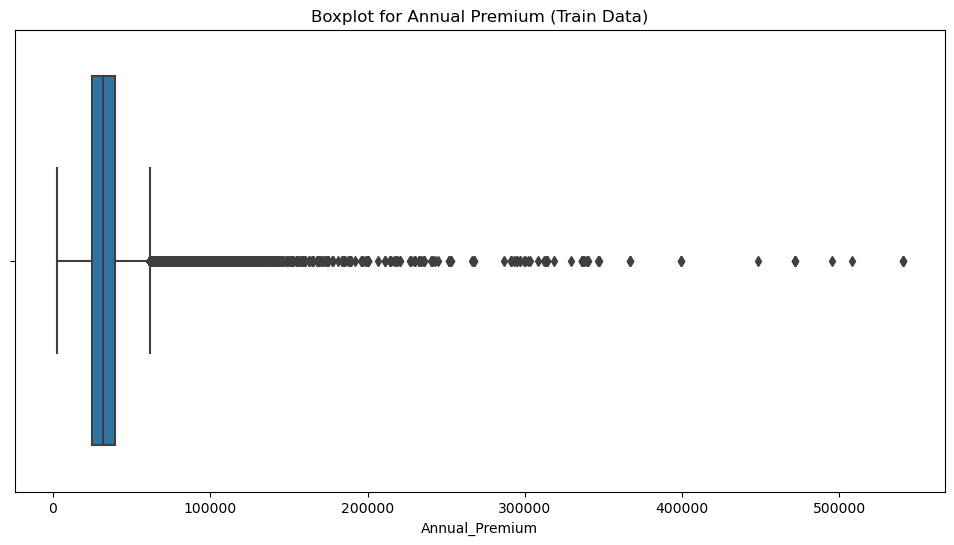

In [6]:
# IQR Method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return outliers

# Example for `Annual_Premium`
outliers_iqr_train = detect_outliers_iqr(train_data, 'Annual_Premium')
outliers_iqr_test = detect_outliers_iqr(test_data, 'Annual_Premium')

print("Outliers in Train Data (IQR method):", outliers_iqr_train.shape[0])
print("Outliers in Test Data (IQR method):", outliers_iqr_test.shape[0])

# 3. Boxplot Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='Annual_Premium')
plt.title('Boxplot for Annual Premium (Train Data)')
plt.show()

In [7]:
# Remove outliers from train and test based on IQR
clean_train_data = train_data[~train_data.index.isin(outliers_iqr_train.index)]
clean_test_data = test_data[~test_data.index.isin(outliers_iqr_test.index)]

print("Train data after removing outliers:", clean_train_data.shape)
print("Test data after removing outliers:", clean_test_data.shape)

Train data after removing outliers: (371747, 12)
Test data after removing outliers: (76165, 11)


In [8]:
# Capping based on the 1st and 99th percentiles
cap_train_data = train_data.copy()
cap_test_data = test_data.copy()

# Define percentiles
low_cap = cap_train_data['Annual_Premium'].quantile(0.01)
high_cap = cap_train_data['Annual_Premium'].quantile(0.99)

# Apply capping
cap_train_data['Annual_Premium'] = np.clip(cap_train_data['Annual_Premium'], low_cap, high_cap)
cap_test_data['Annual_Premium'] = np.clip(cap_test_data['Annual_Premium'], low_cap, high_cap)

print("Capped Train Data shape:", cap_train_data.shape)
print("Capped Test Data shape:", cap_test_data.shape)

Capped Train Data shape: (382154, 12)
Capped Test Data shape: (78273, 11)


In [9]:
# Check if 'Response' exists in the dataset
print(test_data.columns)

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')


In [10]:
# Update the list of numeric columns to exclude any non-numeric columns
numeric_columns = train_data.select_dtypes(include=[np.number]).columns

# Ensure the same columns are in test_data
numeric_columns = [col for col in numeric_columns if col in test_data.columns]

# Function to get Z-score outliers for each numeric column
def detect_outliers_z(df, columns):
    outliers = pd.DataFrame()
    for column in columns:
        z_scores = np.abs(stats.zscore(df[column].dropna()))  # Drop NaN values
        outliers_in_column = df[z_scores > 3]
        print(f"Outliers in {column} (Z-score method): {outliers_in_column.shape[0]}")
        outliers = pd.concat([outliers, outliers_in_column])  # Use concat instead of append
    return outliers

outliers_z_train_all = detect_outliers_z(train_data, numeric_columns)
outliers_z_test_all = detect_outliers_z(test_data, numeric_columns)

Outliers in id (Z-score method): 0
Outliers in Age (Z-score method): 10
Outliers in Driving_License (Z-score method): 723
Outliers in Region_Code (Z-score method): 0
Outliers in Previously_Insured (Z-score method): 0
Outliers in Annual_Premium (Z-score method): 2139
Outliers in Policy_Sales_Channel (Z-score method): 0
Outliers in Vintage (Z-score method): 0
Outliers in id (Z-score method): 0
Outliers in Age (Z-score method): 1
Outliers in Driving_License (Z-score method): 167
Outliers in Region_Code (Z-score method): 0
Outliers in Previously_Insured (Z-score method): 0
Outliers in Annual_Premium (Z-score method): 441
Outliers in Policy_Sales_Channel (Z-score method): 0
Outliers in Vintage (Z-score method): 0


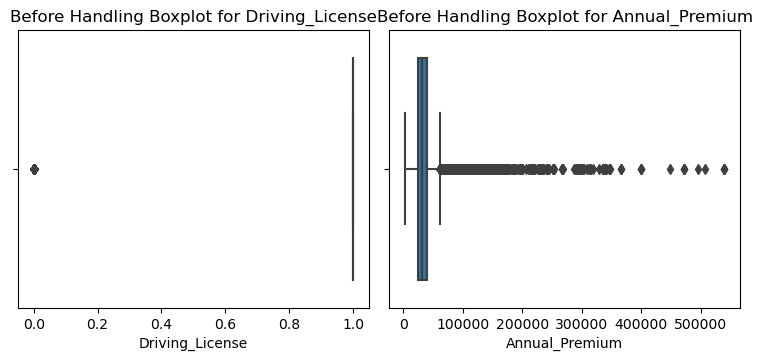

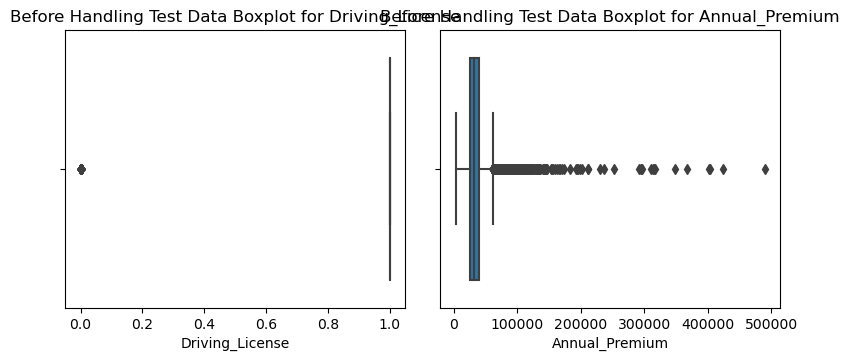

In [11]:
# Function to plot boxplots for each column
def plot_boxplots(df, columns, title_prefix=""):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(columns):
        plt.subplot(3, 4, i + 1)  # Adjust the grid size as needed
        sns.boxplot(x=df[column])
        plt.title(f'{title_prefix} Boxplot for {column}')
    plt.tight_layout()
    plt.show()

# List of columns with outliers
columns_with_outliers = ['Driving_License', 'Annual_Premium']

# Plot boxplots before handling
plot_boxplots(train_data, columns_with_outliers, title_prefix="Before Handling")

# You can include test data if needed:
plot_boxplots(test_data, columns_with_outliers, title_prefix="Before Handling Test Data")

In [12]:
# Function to handle outliers using IQR and remove them
def handle_outliers_iqr(df, columns):
    df_cleaned = df.copy()
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        df_cleaned = df_cleaned[~((df_cleaned[column] < (Q1 - 1.5 * IQR)) | (df_cleaned[column] > (Q3 + 1.5 * IQR)))]
    return df_cleaned

# Handle outliers in training and test data
clean_train_data = handle_outliers_iqr(train_data, columns_with_outliers)
clean_test_data = handle_outliers_iqr(test_data, columns_with_outliers)

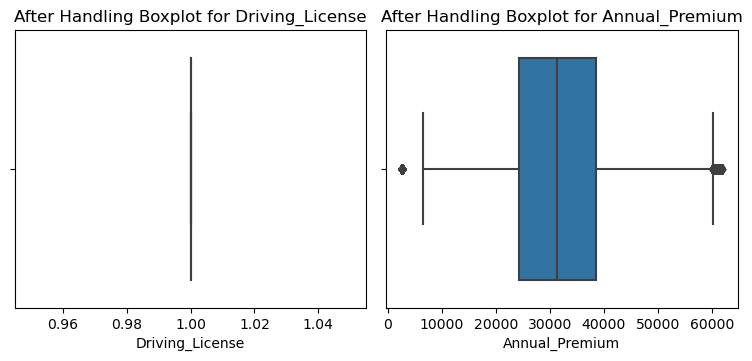

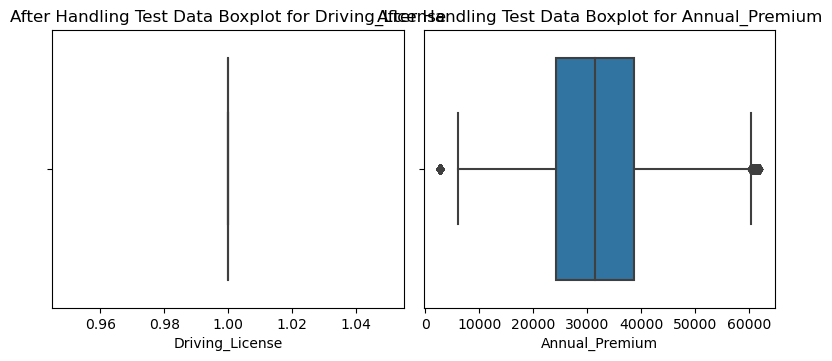

In [13]:
# Plot boxplots after handling
plot_boxplots(clean_train_data, columns_with_outliers, title_prefix="After Handling")

# You can include test data if needed:
plot_boxplots(clean_test_data, columns_with_outliers, title_prefix="After Handling Test Data")

In [14]:
from scipy import stats

# Function to count outliers using Z-score method
def count_outliers_z(df, columns):
    outlier_counts = {}
    for column in columns:
        z_scores = np.abs(stats.zscore(df[column].dropna()))  # Drop NaN values
        outlier_counts[column] = np.sum(z_scores > 3)
    return outlier_counts

# Function to count outliers using IQR method
def count_outliers_iqr(df, columns):
    outlier_counts = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
        outlier_counts[column] = outliers.shape[0]
    return outlier_counts

# Check for outliers in cleaned training and test data
outliers_z_train_cleaned = count_outliers_z(clean_train_data, columns_with_outliers)
outliers_iqr_train_cleaned = count_outliers_iqr(clean_train_data, columns_with_outliers)

outliers_z_test_cleaned = count_outliers_z(clean_test_data, columns_with_outliers)
outliers_iqr_test_cleaned = count_outliers_iqr(clean_test_data, columns_with_outliers)

print("Outliers in Cleaned Train Data (Z-score method):", outliers_z_train_cleaned)
print("Outliers in Cleaned Train Data (IQR method):", outliers_iqr_train_cleaned)

print("Outliers in Cleaned Test Data (Z-score method):", outliers_z_test_cleaned)
print("Outliers in Cleaned Test Data (IQR method):", outliers_iqr_test_cleaned)

Outliers in Cleaned Train Data (Z-score method): {'Driving_License': 0, 'Annual_Premium': 0}
Outliers in Cleaned Train Data (IQR method): {'Driving_License': 0, 'Annual_Premium': 64272}
Outliers in Cleaned Test Data (Z-score method): {'Driving_License': 0, 'Annual_Premium': 0}
Outliers in Cleaned Test Data (IQR method): {'Driving_License': 0, 'Annual_Premium': 13239}


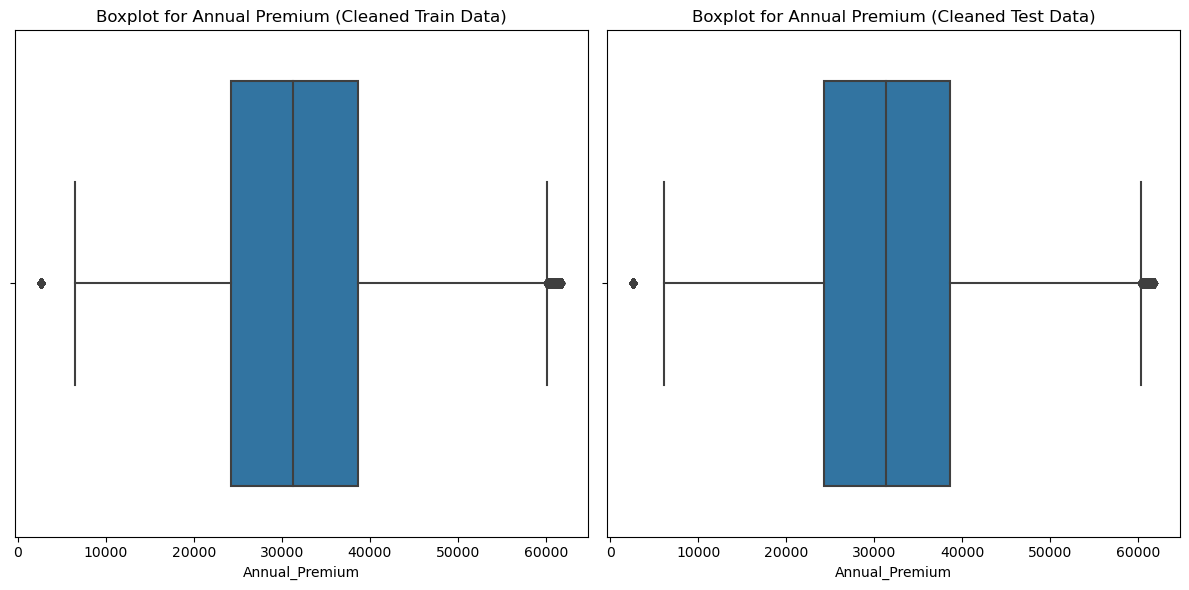

In [15]:
# Plot boxplot for 'Annual_Premium' in cleaned train and test data
plt.figure(figsize=(12, 6))

# Boxplot for Train Data
plt.subplot(1, 2, 1)
sns.boxplot(data=clean_train_data, x='Annual_Premium')
plt.title('Boxplot for Annual Premium (Cleaned Train Data)')

# Boxplot for Test Data
plt.subplot(1, 2, 2)
sns.boxplot(data=clean_test_data, x='Annual_Premium')
plt.title('Boxplot for Annual Premium (Cleaned Test Data)')

plt.tight_layout()
plt.show()

In [16]:
# Check if Driving_License is categorical and encode if necessary
if clean_train_data['Driving_License'].dtype == 'object':
    clean_train_data['Driving_License'] = clean_train_data['Driving_License'].astype('category').cat.codes

In [17]:
# Drop the 'Driving_License' column from the train and test datasets
clean_train_data = clean_train_data.drop(columns=['Driving_License'])
clean_test_data = clean_test_data.drop(columns=['Driving_License'])

# Verify the column has been removed
print(clean_train_data.head())
print(clean_test_data.head())

       id  Gender  Age  Region_Code  Previously_Insured Vehicle_Age  \
0  167647    Male   22          7.0                   1    < 1 Year   
1   17163    Male   42         28.0                   0    1-2 Year   
2   32023  Female   66         33.0                   0    1-2 Year   
3   87447  Female   22         33.0                   0    < 1 Year   
4  501933    Male   28         46.0                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0             No          2630.0                 152.0       16         0  
1            Yes         43327.0                  26.0      135         0  
2            Yes         35841.0                 124.0      253         0  
3             No         27645.0                 152.0       69         0  
4             No         29023.0                 152.0      211         0  
       id  Gender  Age  Region_Code  Previously_Insured Vehicle_Age  \
0   57782  Female   34         39.0           

In [18]:
print(train_data.columns)

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


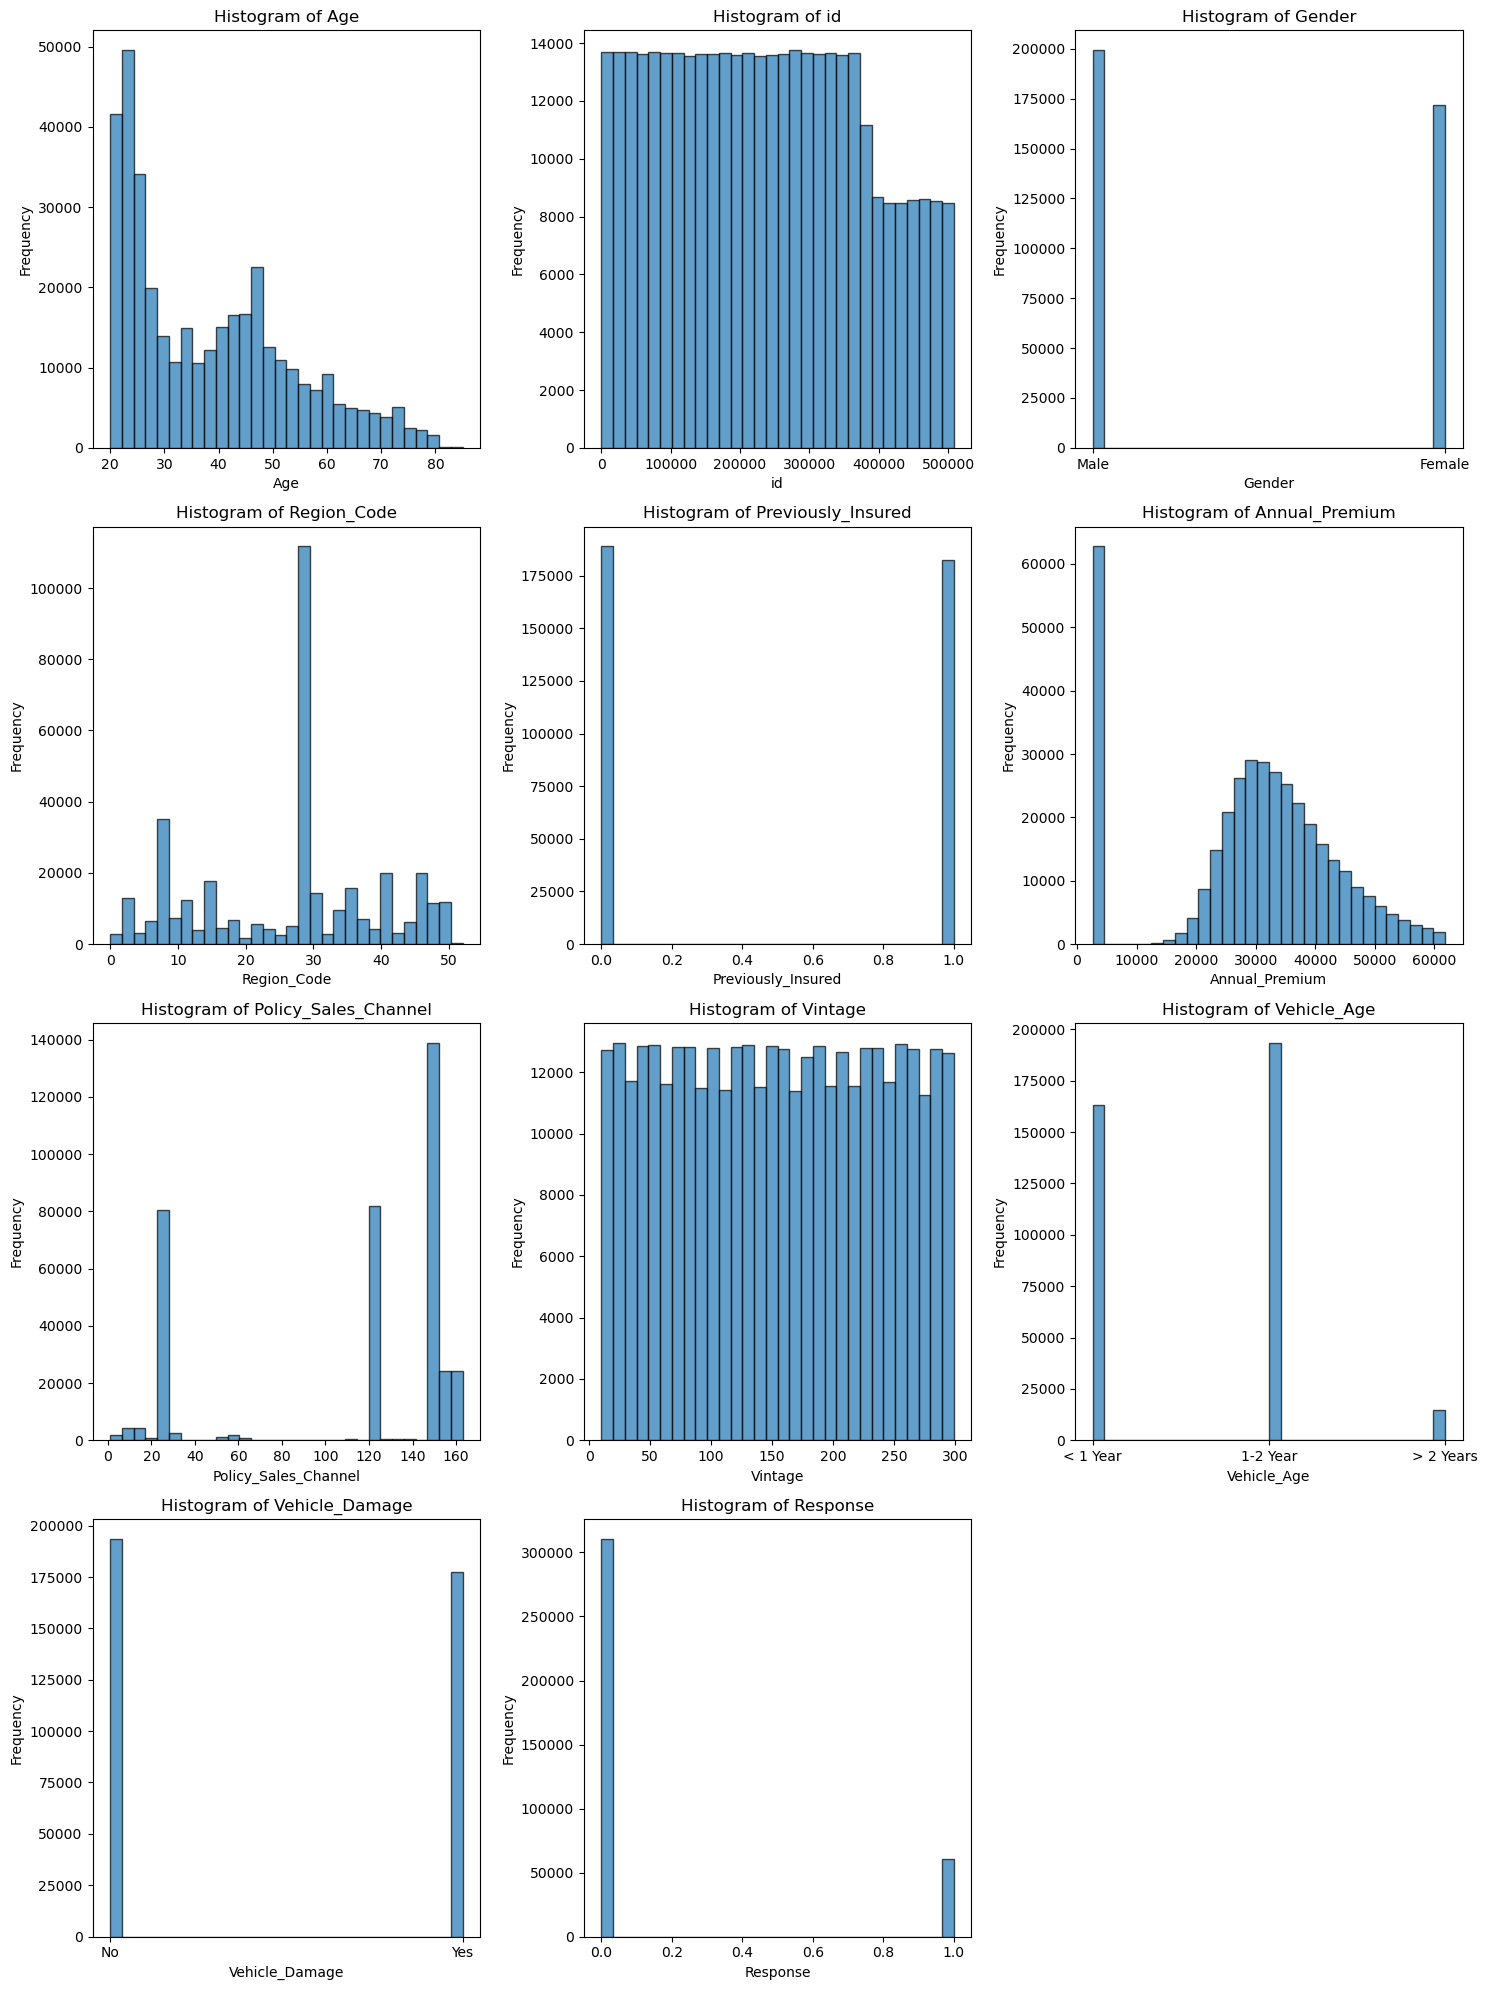

In [19]:
# Plot histograms for each feature in the train dataset
features = ['Age', 'id', 'Gender', 'Region_Code', 'Previously_Insured', 'Annual_Premium',
            'Policy_Sales_Channel', 'Vintage', 'Vehicle_Age', 'Vehicle_Damage', 'Response']

# Determine the number of rows and columns needed for the subplots
num_features = len(features)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows needed

plt.figure(figsize=(15, 5 * num_rows))

for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.hist(clean_train_data[feature], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

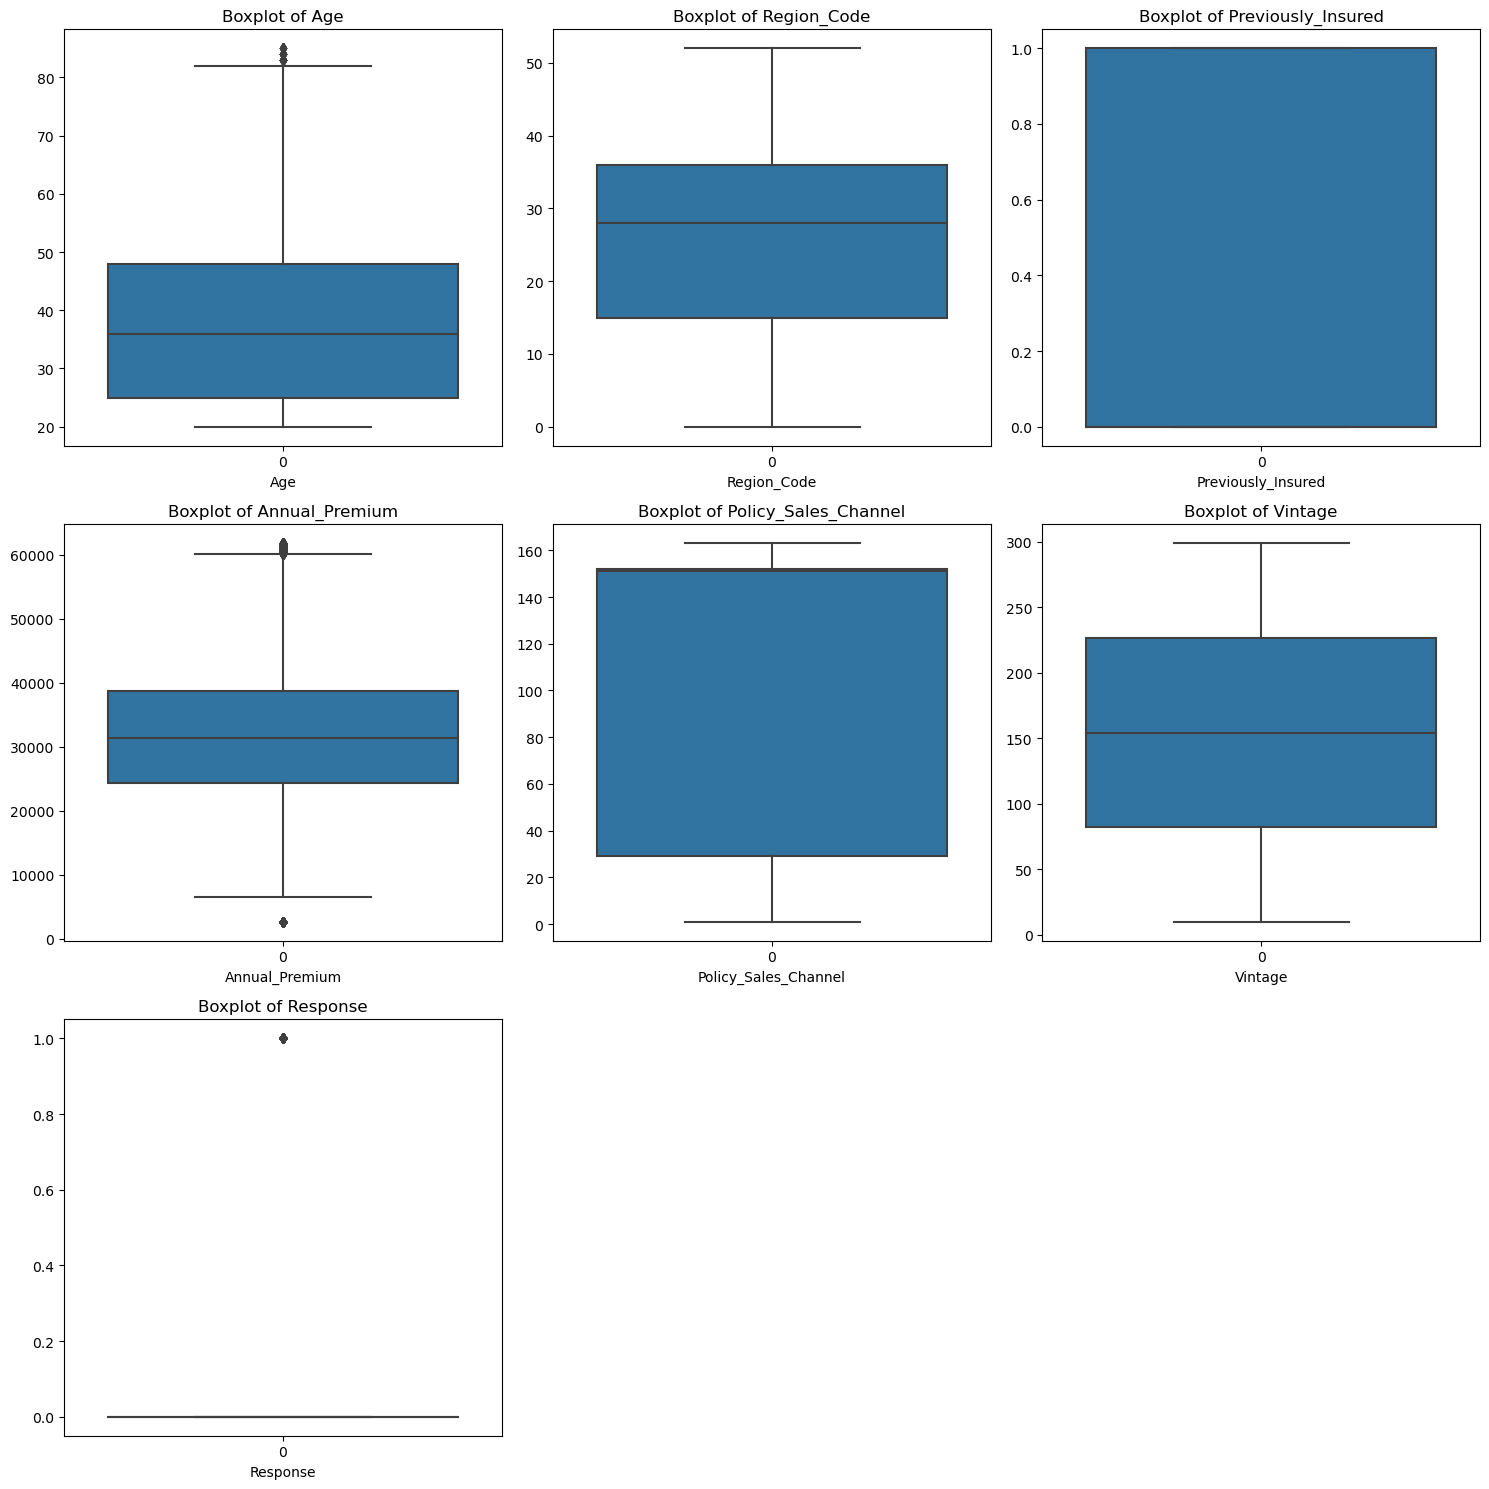

In [20]:
# List of features to plot
features = ['Age','Region_Code', 'Previously_Insured', 'Annual_Premium',
            'Policy_Sales_Channel', 'Vintage', 'Response']

# Determine the number of rows and columns needed for the subplots
num_features = len(features)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows needed

plt.figure(figsize=(15, 5 * num_rows))

for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=clean_train_data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

C:\Users\sharm\AppData\Local\Temp\ipykernel_21788\3995726088.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = clean_train_data.corr()


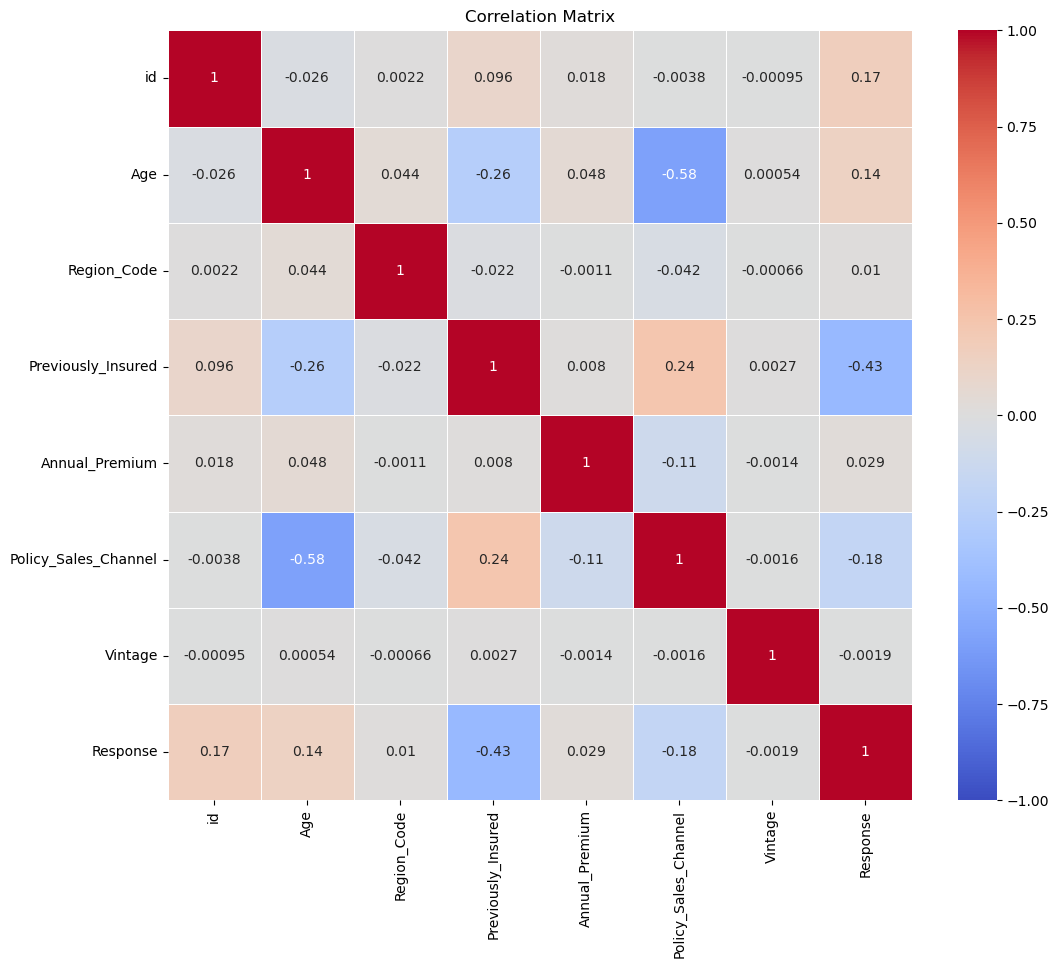

In [21]:
# Calculate the correlation matrix
corr_matrix = clean_train_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [22]:
# One-hot encode categorical features
clean_train_data_encoded = pd.get_dummies(clean_train_data, columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'], drop_first=True)

# Verify the new dataset
print(clean_train_data_encoded.head())

       id  Age  Region_Code  Previously_Insured  Annual_Premium  \
0  167647   22          7.0                   1          2630.0   
1   17163   42         28.0                   0         43327.0   
2   32023   66         33.0                   0         35841.0   
3   87447   22         33.0                   0         27645.0   
4  501933   28         46.0                   1         29023.0   

   Policy_Sales_Channel  Vintage  Response  Gender_Male  Vehicle_Age_< 1 Year  \
0                 152.0       16         0            1                     1   
1                  26.0      135         0            1                     0   
2                 124.0      253         0            0                     0   
3                 152.0       69         0            0                     1   
4                 152.0      211         0            1                     1   

   Vehicle_Age_> 2 Years  Vehicle_Damage_Yes  
0                      0                   0  
1               

In [23]:
from sklearn.model_selection import train_test_split

# Define feature columns and target variable
features = clean_train_data_encoded.drop(columns=['Response'])
target = clean_train_data_encoded['Response']

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Verify the shape of the split data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (296832, 11)
Test data shape: (74208, 11)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
model = LogisticRegression(max_iter=2000, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     62024
           1       0.66      0.48      0.56     12184

    accuracy                           0.87     74208
   macro avg       0.78      0.72      0.74     74208
weighted avg       0.86      0.87      0.87     74208

Confusion Matrix:
[[58995  3029]
 [ 6323  5861]]


C:\Users\sharm\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=2000, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     62024
           1       0.69      0.47      0.56     12184

    accuracy                           0.88     74208
   macro avg       0.80      0.71      0.74     74208
weighted avg       0.87      0.88      0.87     74208

Confusion Matrix:
[[59502  2522]
 [ 6474  5710]]


In [26]:
# Ensure that feature names are strings and do not contain special characters
X_train.columns = [str(col).replace('[', '').replace(']', '').replace('<', '').replace(' ', '_') for col in X_train.columns]
X_test.columns = [str(col).replace('[', '').replace(']', '').replace('<', '').replace(' ', '_') for col in X_test.columns]

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Sampling the data for faster hyperparameter tuning
X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the parameter distribution for XGBoost
param_dist_xgb = {
    'classifier__n_estimators': randint(50, 100),
    'classifier__learning_rate': uniform(0.01, 0.2),
    'classifier__max_depth': randint(3, 7),
    'classifier__subsample': uniform(0.7, 0.3),
    'classifier__colsample_bytree': uniform(0.7, 0.3)
}

# Create and fit RandomizedSearchCV for XGBoost with early stopping
random_search_xgb = RandomizedSearchCV(estimator=Pipeline([
    ('resampling', SMOTE()),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
]), param_distributions=param_dist_xgb, n_iter=10, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)
random_search_xgb.fit(X_train_sampled, y_train_sampled)

# Best parameters and model
print("Best parameters for XGBoost:", random_search_xgb.best_params_)
best_model_xgb = random_search_xgb.best_estimator_

# Evaluate the best model on full test set
y_pred_xgb = best_model_xgb.predict(X_test)

# Classification report
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("ROC-AUC Score:", roc_auc_score(y_test, best_model_xgb.predict_proba(X_test)[:, 1]))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\sharm\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:03:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'classifier__colsample_bytree': 0.8814628643539264, 'classifier__learning_rate': 0.20710404431574325, 'classifier__max_depth': 6, 'classifier__n_estimators': 99, 'classifier__subsample': 0.7167438329320754}
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     62024
           1       0.60      0.59      0.59     12184

    accuracy                           0.87     74208
   macro avg       0.76      0.75      0.76     74208
weighted avg       0.87      0.87      0.87     74208

Confusion Matrix:
[[57249  4775]
 [ 5054  7130]]
ROC-AUC Score: 0.9160831486163957


In [28]:
# Example of encoding categorical variables
clean_train_data['Gender'] = clean_train_data['Gender'].astype('category').cat.codes
clean_train_data['Vehicle_Age'] = clean_train_data['Vehicle_Age'].astype('category').cat.codes
clean_train_data['Vehicle_Damage'] = clean_train_data['Vehicle_Damage'].astype('category').cat.codes

clean_test_data['Gender'] = clean_test_data['Gender'].astype('category').cat.codes
clean_test_data['Vehicle_Age'] = clean_test_data['Vehicle_Age'].astype('category').cat.codes
clean_test_data['Vehicle_Damage'] = clean_test_data['Vehicle_Damage'].astype('category').cat.codes

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

clean_train_data[numerical_columns] = scaler.fit_transform(clean_train_data[numerical_columns])
clean_test_data[numerical_columns] = scaler.transform(clean_test_data[numerical_columns])

In [35]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define features and target
X = clean_train_data.drop(columns=['Response'])  # Replace 'Response' with your actual target column name
y = clean_train_data['Response']

# Apply ANOVA F-statistic
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Get feature scores
scores = pd.DataFrame(selector.scores_, index=X.columns, columns=['Score'])
scores.sort_values(by='Score', ascending=False, inplace=True)
print(scores)

                             Score
Vehicle_Damage        93739.484103
Previously_Insured    84914.569021
Policy_Sales_Channel  12846.086268
id                    10505.727839
Vehicle_Age            9445.134936
Age                    6902.357101
Gender                 1698.907466
Annual_Premium          303.634387
Region_Code              37.568563
Vintage                   1.314768


In [31]:
from sklearn.feature_selection import RFE

# Initialize the model
model = LogisticRegression()

# Initialize RFE with the model
rfe = RFE(model, n_features_to_select=5)
rfe = rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)

C:\Users\sharm\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Selected features: Index(['Age', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Policy_Sales_Channel'],
      dtype='object')


In [32]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Create a new dataset with selected features
selected_features = ['Age', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']
X_selected = X[selected_features]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Train a model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8417600977432802
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     93120
           1       0.52      0.38      0.44     18192

    accuracy                           0.84    111312
   macro avg       0.70      0.66      0.67    111312
weighted avg       0.83      0.84      0.83    111312



In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the model on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

                Feature  Importance
3        Vehicle_Damage    0.354240
0                   Age    0.248399
1    Previously_Insured    0.221474
4  Policy_Sales_Channel    0.146091
2           Vehicle_Age    0.029795


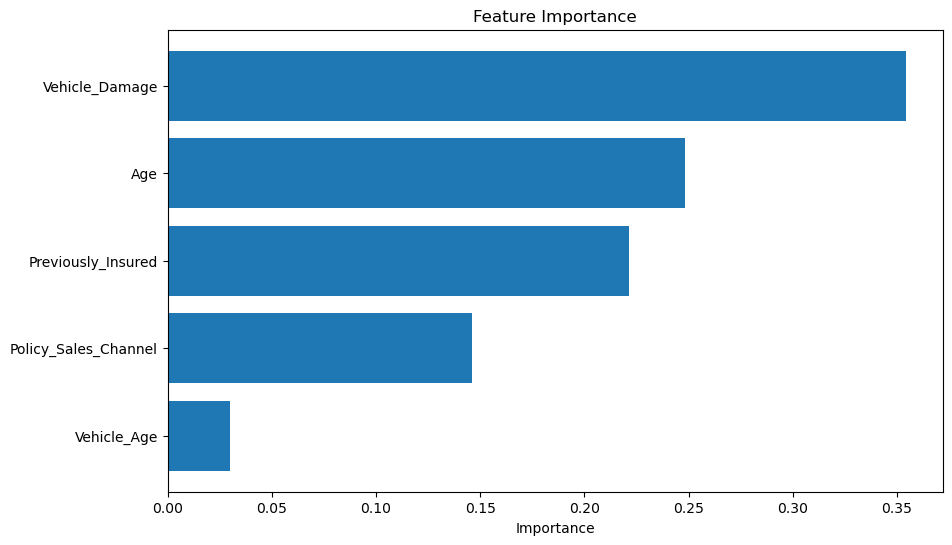

In [34]:
# Analyzing Feature Importance with Random Forest

# Assuming you've trained a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [36]:
from sklearn.decomposition import PCA

# Scale the data before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

pca = PCA(n_components=5)
principal_components = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

Explained variance ratio: [0.50546445 0.2685533  0.12089037 0.07571524 0.02937664]


In [37]:
# Initialize PCA and model
pca = PCA(n_components=5)
model = RandomForestClassifier(random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[('pca', pca), ('model', model)])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print("Accuracy with PCA:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy with PCA: 0.8667888457668536
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     93120
           1       0.70      0.33      0.45     18192

    accuracy                           0.87    111312
   macro avg       0.79      0.65      0.69    111312
weighted avg       0.85      0.87      0.85    111312



In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with X_train_scaled
model.fit(X_train_scaled, y_train)

# Make predictions with X_test_scaled
y_pred = model.predict(X_test_scaled)

In [39]:
print("Training features:", X_train.columns)
print("Test features:", X_test.columns)

Training features: Index(['id', 'Gender', 'Age', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')
Test features: Index(['id', 'Gender', 'Age', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')


Accuracy: 0.8950427626850654
Precision: 0.8565793798619481
Recall: 0.42974934036939316
F1 Score: 0.5723489146747684
ROC AUC Score: 0.9148873549572978
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     93120
           1       0.86      0.43      0.57     18192

    accuracy                           0.90    111312
   macro avg       0.88      0.71      0.76    111312
weighted avg       0.89      0.90      0.88    111312

Confusion Matrix:
[[91811  1309]
 [10374  7818]]


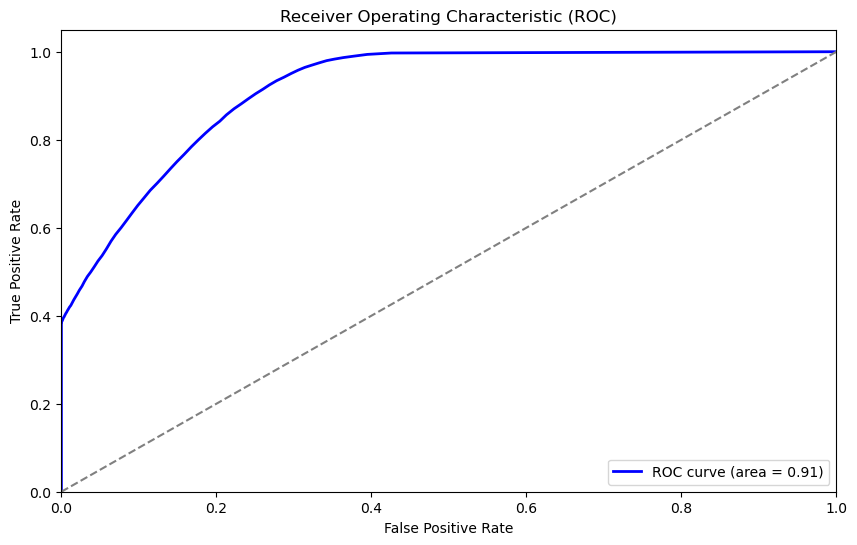

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Example feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [41]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# Create pipeline with SMOTE and logistic regression
smote = SMOTE(random_state=42)
model = LogisticRegression(max_iter=1000, random_state=42)

pipeline = ImbPipeline([
    ('smote', smote),
    ('classifier', model)
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_train)
print(y_pred)

[1 0 1 ... 0 0 0]


In [42]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict on the test set
y_test_pred = pipeline.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
print(f"ROC AUC Score: {roc_auc:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     93120
           1       0.39      0.86      0.53     18192

    accuracy                           0.75    111312
   macro avg       0.67      0.80      0.68    111312
weighted avg       0.87      0.75      0.78    111312

Confusion Matrix:
[[68298 24822]
 [ 2572 15620]]
ROC AUC Score: 0.88


In [43]:
import xgboost as xgb
# Define the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model
xgb_model.fit(X, y)

# Predict and evaluate
y_pred = xgb_model.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))
print("Classification Report:")
print(classification_report(y, y_pred))

C:\Users\sharm\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:11:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9018461621388529
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94    310556
           1       0.97      0.41      0.58     60484

    accuracy                           0.90    371040
   macro avg       0.94      0.70      0.76    371040
weighted avg       0.91      0.90      0.88    371040



In [44]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1]
}

xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1}
Best score: 0.8984976635424919


In [45]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.89754474 0.89851498 0.89750431 0.89844761 0.89750431]
Mean Cross-Validation Score: 0.8979031910306166


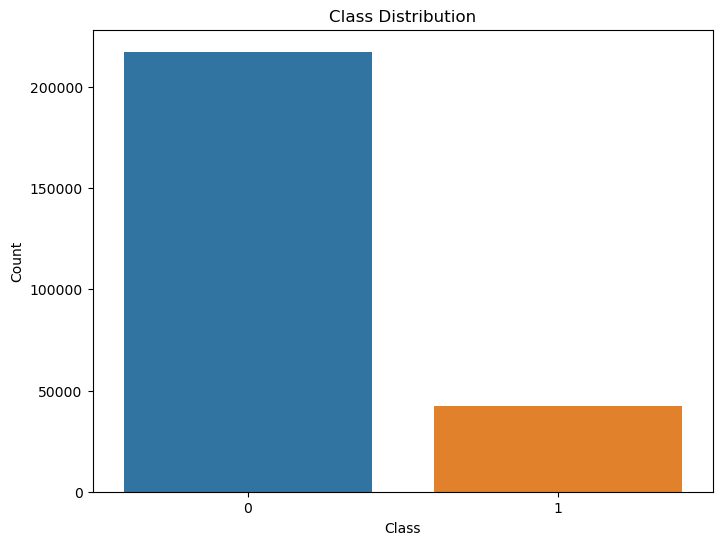

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_train is your target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

C:\Users\sharm\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


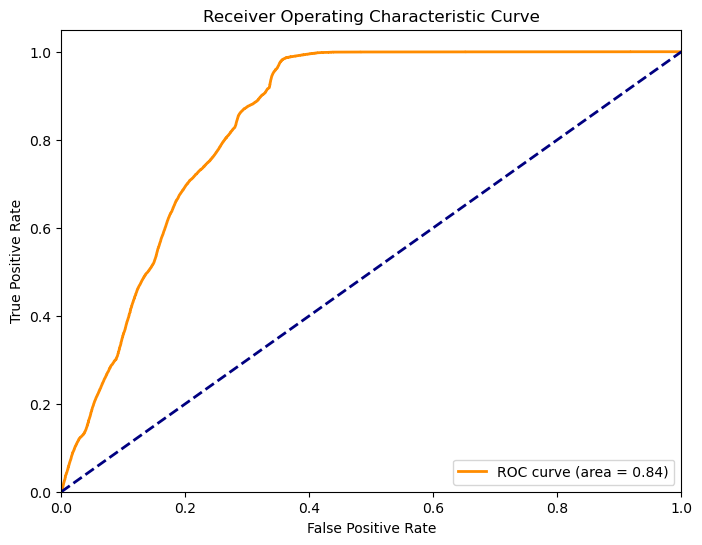

In [47]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Dashed diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

In [48]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Assuming you have your features (X) and target variable (y)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create XGBoost model
xgb_model = XGBClassifier(eval_metric='mlogloss')

# Train the model on the balanced dataset
xgb_model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = xgb_model.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     93120
           1       0.80      0.47      0.59     18192

    accuracy                           0.89    111312
   macro avg       0.85      0.72      0.77    111312
weighted avg       0.89      0.89      0.88    111312

Confusion Matrix:
[[91037  2083]
 [ 9649  8543]]
ROC AUC Score: 0.9261426274449969


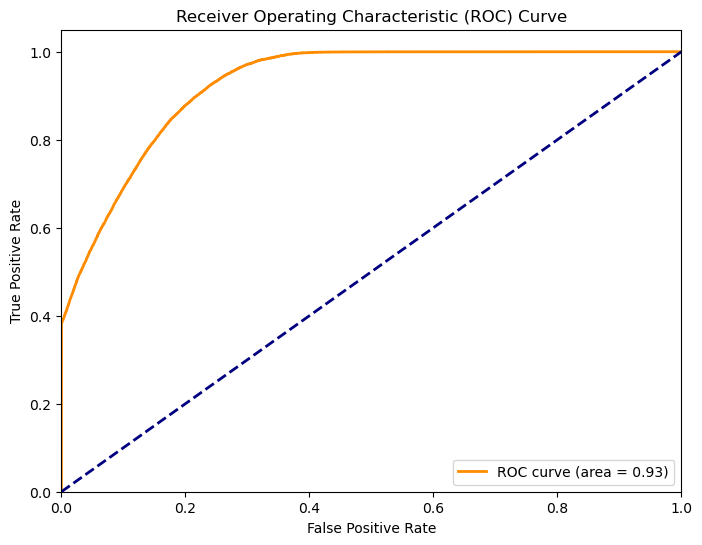

In [49]:
# Evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))

# Visualize ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

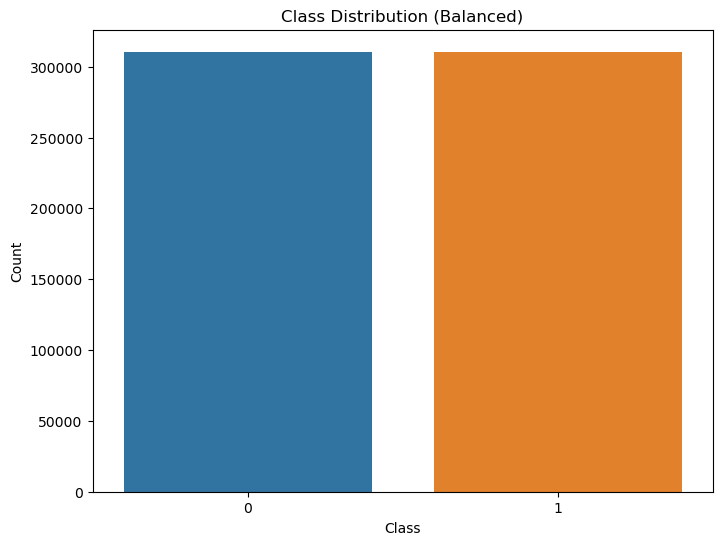

In [50]:
# Assuming y_resampled is the balanced target variable after oversampling
y_resampled_counts = pd.Series(y_resampled).value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=y_resampled_counts.index, y=y_resampled_counts.values)
plt.title('Class Distribution (Balanced)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     93120
           1       0.80      0.47      0.59     18192

    accuracy                           0.89    111312
   macro avg       0.85      0.72      0.77    111312
weighted avg       0.89      0.89      0.88    111312

Confusion Matrix:
[[91037  2083]
 [ 9649  8543]]
Accuracy: 0.894602558574098
Precision: 0.8039713909279127
Recall: 0.4696020228671944
F1 Score: 0.5928933305572905
ROC AUC Score: 0.9261426274449969


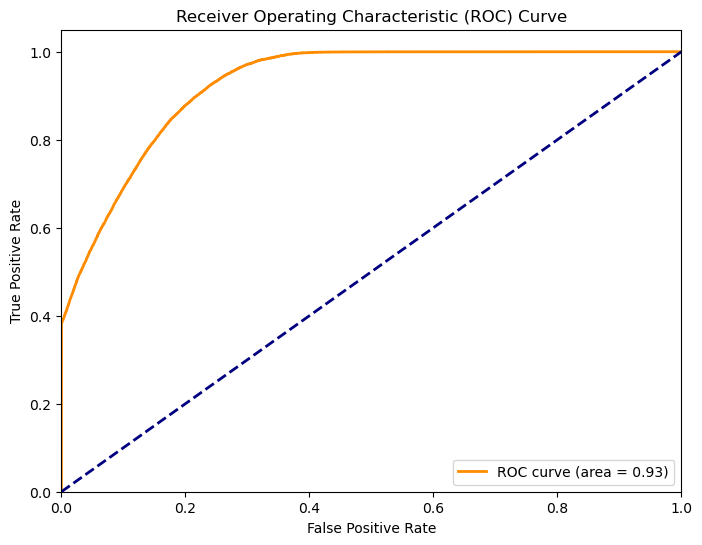

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score

# Create XGBoost model
xgb_model = XGBClassifier(eval_metric='mlogloss')

# Train the model on the balanced dataset
xgb_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Visualize ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Train the model on the balanced dataset
xgb_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC calculation

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     93120
           1       0.80      0.47      0.59     18192

    accuracy                           0.89    111312
   macro avg       0.85      0.72      0.77    111312
weighted avg       0.89      0.89      0.88    111312

Confusion Matrix:
[[91037  2083]
 [ 9649  8543]]
Accuracy: 0.89
Precision: 0.80
Recall: 0.47
F1 Score: 0.59
ROC AUC Score: 0.93


In [53]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Define features for training and test datasets
features = ['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

# Define features and target for training
X_train = clean_train_data[features]
y_train = clean_train_data['Response']

# Define features for testing
X_test = clean_test_data[features]

# Convert categorical variables into dummy variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Handle any mismatch in columns between training and test data
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC calculation

# Print predictions and probabilities
print("Predictions:")
print(y_pred)
print("Prediction Probabilities:")
print(y_prob)

Predictions:
[0 0 0 ... 0 0 0]
Prediction Probabilities:
[5.3431786e-04 2.9062527e-01 7.4219162e-04 ... 6.1683194e-04 1.5235040e-04
 1.4960271e-04]


In [54]:
# Estimate Response Likelihood Based on Premium
# Create a DataFrame to simulate varying premium values
premium_values = [15000, 25000, 35000, 45000, 55000]  # Example premium values
simulation_data = pd.DataFrame({
    'Gender': ['Male'] * len(premium_values),
    'Age': [30] * len(premium_values),
    'Region_Code': [1] * len(premium_values),
    'Previously_Insured': [0] * len(premium_values),
    'Vehicle_Age': ['1-2 Year'] * len(premium_values),
    'Vehicle_Damage': ['No'] * len(premium_values),
    'Annual_Premium': premium_values,
    'Policy_Sales_Channel': [26] * len(premium_values),
    'Vintage': [100] * len(premium_values)
})

# Convert to dummy variables
simulation_data = pd.get_dummies(simulation_data)
simulation_data = simulation_data.reindex(columns=X_train.columns, fill_value=0)

# Predict response probabilities for simulated data
premium_probabilities = xgb_model.predict_proba(simulation_data)[:, 1]

# Display the results
simulation_results = pd.DataFrame({
    'Annual_Premium': premium_values,
    'Predicted_Probability': premium_probabilities
})

print("Estimated Response Likelihood Based on Premium:")
print(simulation_results)

Estimated Response Likelihood Based on Premium:
   Annual_Premium  Predicted_Probability
0           15000               0.163778
1           25000               0.163778
2           35000               0.163778
3           45000               0.163778
4           55000               0.163778


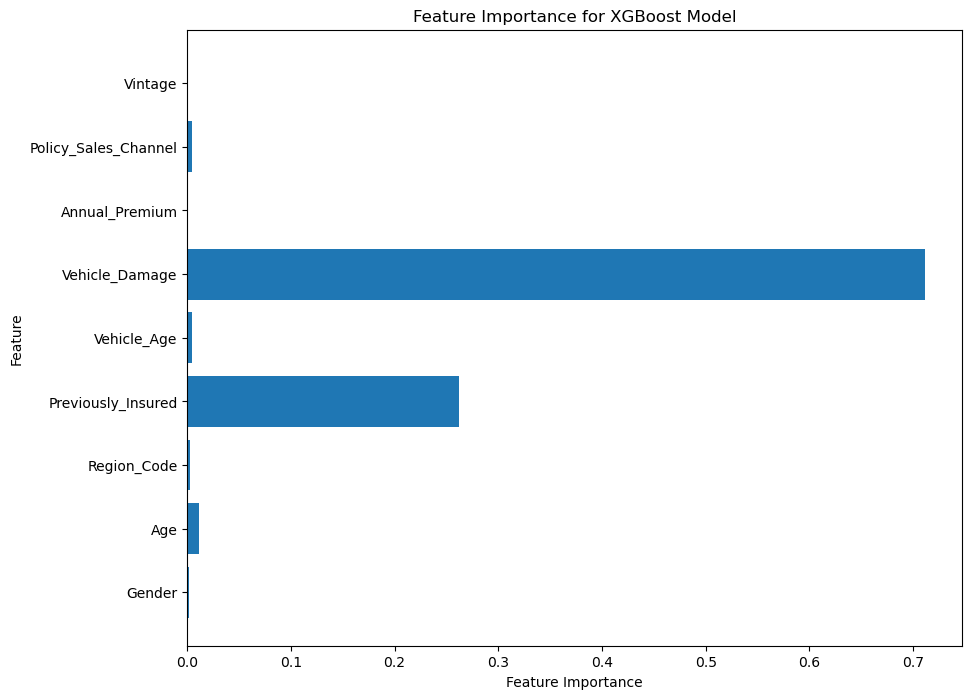

In [55]:
import matplotlib.pyplot as plt

# Plot feature importance
importance = xgb_model.feature_importances_
feature_names = X_train.columns
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for XGBoost Model')
plt.show()

In [56]:
# Define features and target
features = ['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
X = clean_train_data[features]
y = clean_train_data['Response']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical variables into dummy variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Handle any mismatch in columns between training and test data
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Performance on the Test Set:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Performance on the Test Set:
Accuracy: 0.85
Precision: 0.55
Recall: 0.41
F1 Score: 0.47
ROC AUC Score: 0.90


In [57]:
# Define important features
important_features = ['Vehicle_Damage', 'Previously_Insured']
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Initialize and train the XGBoost model with important features
xgb_model_important = xgb.XGBClassifier(eval_metric='mlogloss')
xgb_model_important.fit(X_train_important, y_train)

# Make predictions on the test set with important features
y_pred_important = xgb_model_important.predict(X_test_important)
y_prob_important = xgb_model_important.predict_proba(X_test_important)[:, 1]

# Evaluate performance
accuracy_important = accuracy_score(y_test, y_pred_important)
precision_important = precision_score(y_test, y_pred_important)
recall_important = recall_score(y_test, y_pred_important)
f1_important = f1_score(y_test, y_pred_important)
roc_auc_important = roc_auc_score(y_test, y_prob_important)

print("Performance with Important Features:")
print(f"Accuracy: {accuracy_important:.2f}")
print(f"Precision: {precision_important:.2f}")
print(f"Recall: {recall_important:.2f}")
print(f"F1 Score: {f1_important:.2f}")
print(f"ROC AUC Score: {roc_auc_important:.2f}")

Performance with Important Features:
Accuracy: 0.84
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
ROC AUC Score: 0.82


C:\Users\sharm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(eval_metric='mlogloss'),
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate performance with the best model
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_prob_best)

print("Performance with Best Model:")
print(f"Accuracy: {accuracy_best:.2f}")
print(f"Precision: {precision_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"F1 Score: {f1_best:.2f}")
print(f"ROC AUC Score: {roc_auc_best:.2f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Performance with Best Model:
Accuracy: 0.85
Precision: 0.55
Recall: 0.38
F1 Score: 0.45
ROC AUC Score: 0.90


In [59]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}


In [60]:
print("Performance with Best Model:")
print(f"Accuracy: {accuracy_best:.2f}")
print(f"Precision: {precision_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"F1 Score: {f1_best:.2f}")
print(f"ROC AUC Score: {roc_auc_best:.2f}")

Performance with Best Model:
Accuracy: 0.85
Precision: 0.55
Recall: 0.38
F1 Score: 0.45
ROC AUC Score: 0.90


In [64]:
import pandas as pd

def get_user_input():
    # Prompt user for input
    gender = input("Enter Gender (Male/Female): ")
    age = int(input("Enter Age: "))
    region_code = int(input("Enter Region Code: "))
    previously_insured = int(input("Enter Previously Insured (0/1): "))
    vehicle_age = input("Enter Vehicle Age (e.g., '1-2 Year', '3-4 Year', '> 4 Years'): ")
    vehicle_damage = input("Enter Vehicle Damage (Yes/No): ")
    annual_premium = float(input("Enter Annual Premium: "))
    policy_sales_channel = int(input("Enter Policy Sales Channel: "))
    vintage = int(input("Enter Vintage: "))
    
    return pd.DataFrame({
        'Gender': [gender],
        'Age': [age],
        'Region_Code': [region_code],
        'Previously_Insured': [previously_insured],
        'Vehicle_Age': [vehicle_age],
        'Vehicle_Damage': [vehicle_damage],
        'Annual_Premium': [annual_premium],
        'Policy_Sales_Channel': [policy_sales_channel],
        'Vintage': [vintage]
    })

def predict_insurance_probability(user_input_df, model, feature_columns):
    # Convert to dummy variables
    user_input_df = pd.get_dummies(user_input_df)
    
    # Reindex to match the feature columns of the training data
    user_input_df = user_input_df.reindex(columns=feature_columns, fill_value=0)
    
    # Predict response probabilities
    user_input_prob = model.predict_proba(user_input_df)[:, 1]
    return user_input_prob

# Example usage
if __name__ == "__main__":
    # Assume `loaded_model` is your trained model and `X_train.columns` contains the feature columns
    user_input_df = get_user_input()
    predicted_probability = predict_insurance_probability(
        user_input_df=user_input_df,
        model=loaded_model,
        feature_columns=X_train.columns
    )
    
    print("Predicted Probability for New Data:", predicted_probability)

Enter Gender (Male/Female): Male
Enter Age: 25
Enter Region Code: 6
Enter Previously Insured (0/1): 1
Enter Vehicle Age (e.g., '1-2 Year', '3-4 Year', '> 4 Years'): 1-2
Enter Vehicle Damage (Yes/No): Yes
Enter Annual Premium: 2365
Enter Policy Sales Channel: 5635
Enter Vintage: 45
Predicted Probability for New Data: [0.00467206]


In [62]:
import joblib

# Save the best model to a file
joblib.dump(best_model, 'xgb_best_model.pkl')

['xgb_best_model.pkl']

In [63]:
import joblib

# Load the model from file
loaded_model = joblib.load('xgb_best_model.pkl')

In [65]:
# Save to CSV
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [66]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score

# Load the model
loaded_model = joblib.load('xgb_best_model.pkl')

# Load the test data from CSV
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

# Ensure that 'y_test' is a Series if it's loaded as a DataFrame
y_test = y_test.squeeze()

# Predict on the test set
y_pred = loaded_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


In [70]:
features_df = pd.DataFrame([features])

In [71]:
features_df

,0,1,2,3,4,5,6,7,8
0,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage


In [82]:
from flask import Flask, request, jsonify, render_template_string
import joblib
import pandas as pd

app = Flask(__name__)

# Load the model
model = joblib.load('xgb_best_model.pkl')

# HTML form for input
html_form = '''
<!DOCTYPE html>
<html>
<head>
    <title>Prediction API</title>
</head>
<body>
    <h2>Enter Feature Values</h2>
    <form action="/predict" method="POST">
        <label for="gender">Gender (Male/Female):</label><br>
        <input type="text" id="gender" name="Gender"><br><br>
        
        <label for="age">Age:</label><br>
        <input type="number" id="age" name="Age"><br><br>

        <label for="region_code">Region Code:</label><br>
        <input type="number" id="region_code" name="Region_Code"><br><br>

        <label for="previously_insured">Previously Insured (0/1):</label><br>
        <input type="number" id="previously_insured" name="Previously_Insured"><br><br>

        <label for="vehicle_age">Vehicle Age:</label><br>
        <input type="number" id="vehicle_age" name="Vehicle_Age"><br><br>

        <label for="vehicle_damage">Vehicle Damage (Yes/No):</label><br>
        <input type="text" id="vehicle_damage" name="Vehicle_Damage"><br><br>

        <label for="annual_premium">Annual Premium:</label><br>
        <input type="number" id="annual_premium" name="Annual_Premium"><br><br>

        <label for="policy_sales_channel">Policy Sales Channel:</label><br>
        <input type="number" id="policy_sales_channel" name="Policy_Sales_Channel"><br><br>

        <label for="vintage">Vintage:</label><br>
        <input type="number" id="vintage" name="Vintage"><br><br>

        <input type="submit" value="Predict">
    </form>
</body>
</html>
'''

@app.route('/')
def home():
    # Render the form for input
    return render_template_string(html_form)

@app.route('/favicon.ico')
def favicon():
    return '', 204  # Handle favicon requests

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Print the form data for debugging
        print(request.form)

        # Extract data from form input
        features = {
            'Gender': request.form['Gender'],
            'Age': request.form['Age'],
            'Region_Code': request.form['Region_Code'],
            'Previously_Insured': request.form['Previously_Insured'],
            'Vehicle_Age': request.form['Vehicle_Age'],
            'Vehicle_Damage': request.form['Vehicle_Damage'],
            'Annual_Premium': request.form['Annual_Premium'],
            'Policy_Sales_Channel': request.form['Policy_Sales_Channel'],
            'Vintage': request.form['Vintage']
        }
    except KeyError as e:
        # Handle missing keys by returning a user-friendly error message
        return f'<h3>Error: Missing field {str(e)}</h3><a href="/">Go Back</a>'

    # Convert the data to a DataFrame
    features_df = pd.DataFrame([features])

    # Convert numeric columns to appropriate types
    features_df['Age'] = features_df['Age'].astype(int)
    features_df['Region_Code'] = features_df['Region_Code'].astype(int)
    features_df['Previously_Insured'] = features_df['Previously_Insured'].astype(int)
    features_df['Annual_Premium'] = features_df['Annual_Premium'].astype(float)
    features_df['Policy_Sales_Channel'] = features_df['Policy_Sales_Channel'].astype(int)
    features_df['Vintage'] = features_df['Vintage'].astype(int)
    features_df['Vehicle_Age'] = features_df['Vehicle_Age'].astype(int)

    # Encode categorical features
    features_df['Gender'] = features_df['Gender'].map({'Male': 0, 'Female': 1}).astype(int)
    features_df['Vehicle_Damage'] = features_df['Vehicle_Damage'].map({'No': 0, 'Yes': 1}).astype(int)

    # Predict using the model
    prediction = model.predict_proba(features_df)  # Use predict_proba for probabilities

    # Return the prediction result in the web page
    return f'<h3>Predicted Probability for New Data: {prediction.tolist()}</h3><a href="/">Go Back</a>'

if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [07/Sep/2024 12:25:18] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Sep/2024 12:25:18] "GET /favicon.ico HTTP/1.1" 204 -
127.0.0.1 - - [07/Sep/2024 12:25:50] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [07/Sep/2024 12:25:50] "GET /favicon.ico HTTP/1.1" 204 -


ImmutableMultiDict([('Gender', 'Male'), ('Age', '22'), ('Region_Code', '7'), ('Previously_Insured', '1'), ('Vehicle_Age', '2'), ('Vehicle_Damage', 'Yes'), ('Annual_Premium', '2256'), ('Policy_Sales_Channel', '124'), ('Vintage', '156')])


127.0.0.1 - - [07/Sep/2024 12:28:19] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Sep/2024 12:28:19] "GET /favicon.ico HTTP/1.1" 204 -
127.0.0.1 - - [07/Sep/2024 12:28:29] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [07/Sep/2024 12:28:29] "GET /favicon.ico HTTP/1.1" 204 -


ImmutableMultiDict([('Gender', 'Male'), ('Age', '22'), ('Region_Code', '7'), ('Previously_Insured', '1'), ('Vehicle_Age', '2'), ('Vehicle_Damage', 'Yes'), ('Annual_Premium', '2256'), ('Policy_Sales_Channel', '124'), ('Vintage', '156')])
